# Exploratory Data Analysis

## Data Storytelling

give summary here

In [1]:
#Import necessary packages 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
# load the dataset
df = pd.read_csv('df1.csv', index_col=0)

In [4]:
df.shape

(540, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 555
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   row              540 non-null    int64  
 1   Year             540 non-null    int64  
 2   Product_type     540 non-null    object 
 3   Brand            540 non-null    object 
 4   Title            189 non-null    object 
 5   Ticker           540 non-null    object 
 6   Mkt_Date         540 non-null    object 
 7   Mkt_Date_plus6   540 non-null    object 
 8   close            389 non-null    float64
 9   close_plus6      397 non-null    float64
 10  market_cap_cur   425 non-null    float64
 11  shares_out       448 non-null    float64
 12  year_inc         495 non-null    float64
 13  spx_close        532 non-null    float64
 14  spx_plus6        531 non-null    float64
 15  Previous_SBs     540 non-null    int64  
 16  Yearly_Ad_Count  540 non-null    int64  
 17  New             

## Cleaning

The dataset still needs some cleanup. `row` doesn't hold any information anymore, so we can drop that.

Let's look at other variables, `Year` looks fine all values filled in. 

`Product_type` was worked on hard but still has lots of categories, but they all seem to have value so let's keep them.


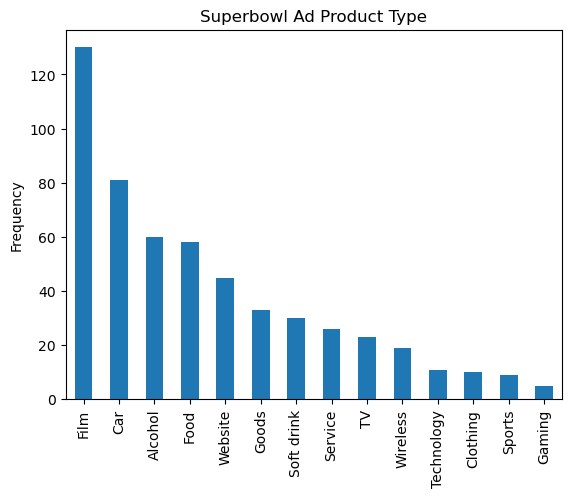

In [6]:
# Bar graph of Product_type
df['Product_type'].value_counts().plot(kind="bar")
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Superbowl Ad Product Type')
plt.xticks(rotation=90)
plt.show()

Look at `Brand` next.

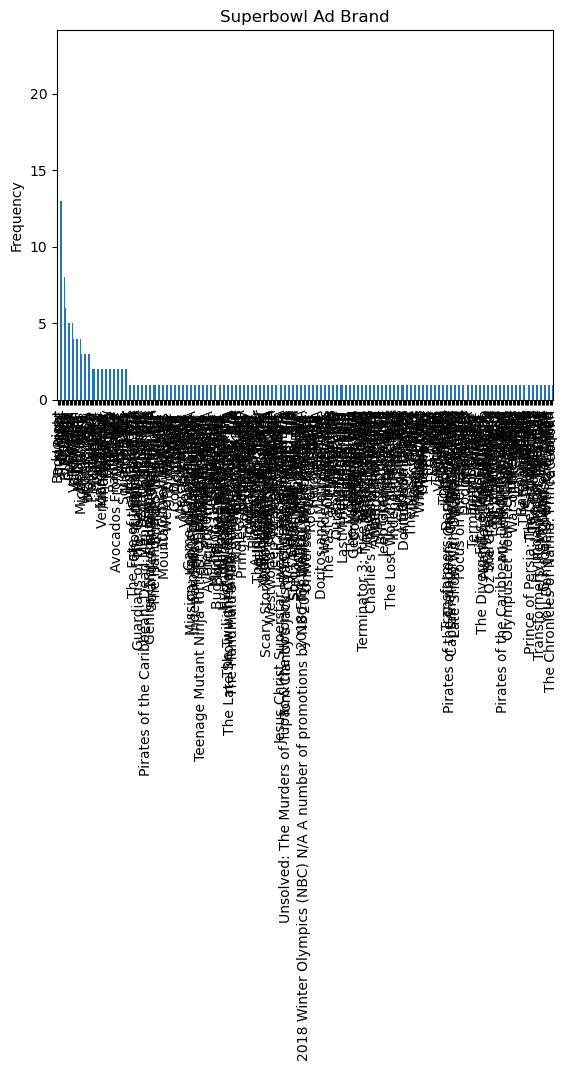

In [7]:
# hopeless mess
df['Brand'].value_counts().plot(kind="bar")
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Superbowl Ad Brand')
plt.xticks(rotation=90)
plt.show()

Clearly too much stuff here. Maybe if we drop Films and Movies it will look better.

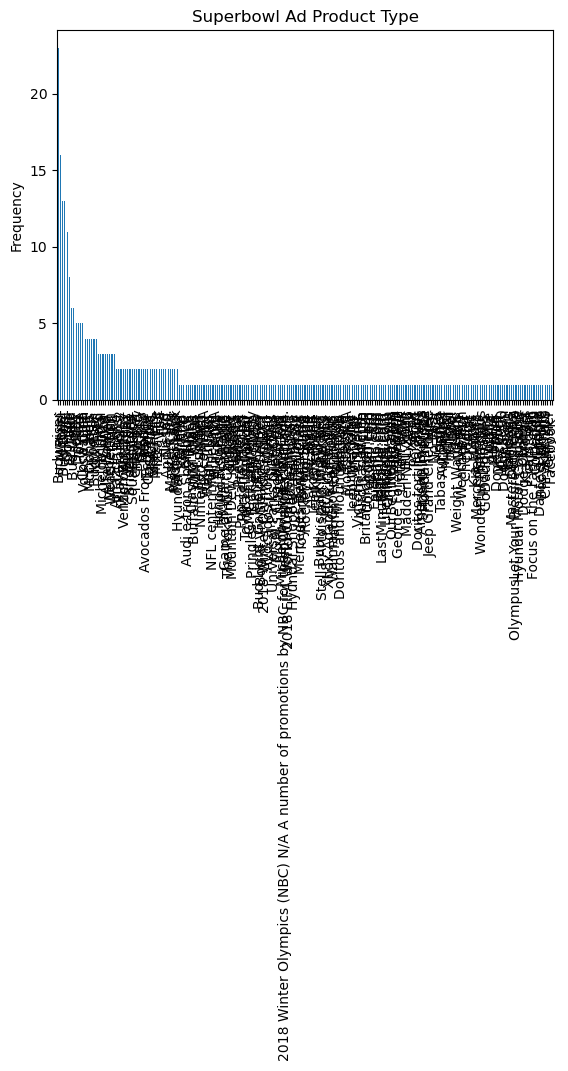

In [8]:
# hopeless mess #2
df[~(df.Product_type.isin(['Film','TV']))]['Brand'].value_counts().plot(kind="bar")
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Superbowl Ad Product Type')
plt.xticks(rotation=90)
plt.show()

Still looks hopeless. Drop this column.

`Title` next.

In [9]:
# Look at the unique `Title`s 
df.Title.unique()

array(['Scuba Diver', 'Humbler', 'Rifle', 'Monks', 'Hey Kid, Catch!',
       'Now with a Flash', 'Hopscotch', 'Color Computer', 'Train',
       'The Doubters', '1984', 'Get Started', nan, 'Turbocharged Dream',
       'The Race', 'Cindy Crawford', 'Teaser', 'Slingshot', 'Showdown',
       'Hare Jordan', 'Inhale', 'The Date', 'Baby Swing', 'Pigeons',
       'Grandma', 'Nuzzle and Nibble', 'Party', 'Darth Vader',
       'ACME Pontiac', 'Chicken Pool', 'Shopping', 'Master Plan',
       'Laundromat', 'Bold Innovations', 'Mosquito', 'Elvis', 'Pajamas',
       'Drill', 'Elephant', 'We Apologize', 'Goose', 'Have Some Fun',
       'Mystery', 'Anthony', 'Groundhog Day', 'Paper or Plastic',
       'Dalmatians', 'Lashing', 'Lobster', 'Smokin', 'New Yorker',
       'Aliens', 'When I Grow Up', 'Toons', 'Stanley Cup', 'HAL', 'HQ',
       'Baby Girl Power', 'Elevator', 'Cat', 'Photo Shoot', 'Which Game?',
       "Rex's Motivation", 'Sexy Girl', 'I Need a Car', 'Untitled',
       'Mike and Mike', 'Char

Not seeing any value here. Drop `Title`.

Look at `Mkt_Date` and  `Mkt_Date_plus6`. These were derived from the year then used to extract other data so they should be dropped as well.


`Year` and `Ticker` are our primary identifiers but may need to be adjusted for indexing purposes. Leave them for later.

`close` and `close_plus6` are both obviously linked to `return` and if all the instances without a return are dropped both should automatically have no Na values. Leave them as well for now.

`market_cap_cur` is the current(not historical) market cap of the stock. 

<function matplotlib.pyplot.show(close=None, block=None)>

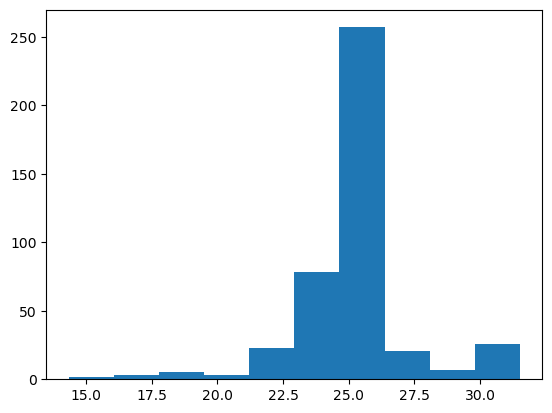

In [10]:
# Quick histogram of the log of `market_cap_cur`
plt.hist(np.log(df['market_cap_cur']))
plt.show

There are a couple of options here but it seems to over a very wide range with some extreme outliers. Log seems to help but it doesn't need cleaning, yet.

`shares_out` seems unrelated

In [11]:
df = df.drop(columns=['Brand','row','Title','Mkt_Date', 'Mkt_Date_plus6' ])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 555
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             540 non-null    int64  
 1   Product_type     540 non-null    object 
 2   Ticker           540 non-null    object 
 3   close            389 non-null    float64
 4   close_plus6      397 non-null    float64
 5   market_cap_cur   425 non-null    float64
 6   shares_out       448 non-null    float64
 7   year_inc         495 non-null    float64
 8   spx_close        532 non-null    float64
 9   spx_plus6        531 non-null    float64
 10  Previous_SBs     540 non-null    int64  
 11  Yearly_Ad_Count  540 non-null    int64  
 12  New              540 non-null    int64  
 13  return           388 non-null    float64
 14  SP_return        531 non-null    float64
 15  overperform      540 non-null    int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 71.7+ KB


Text(0.5, 0.98, 'Data Feature Correlation ')

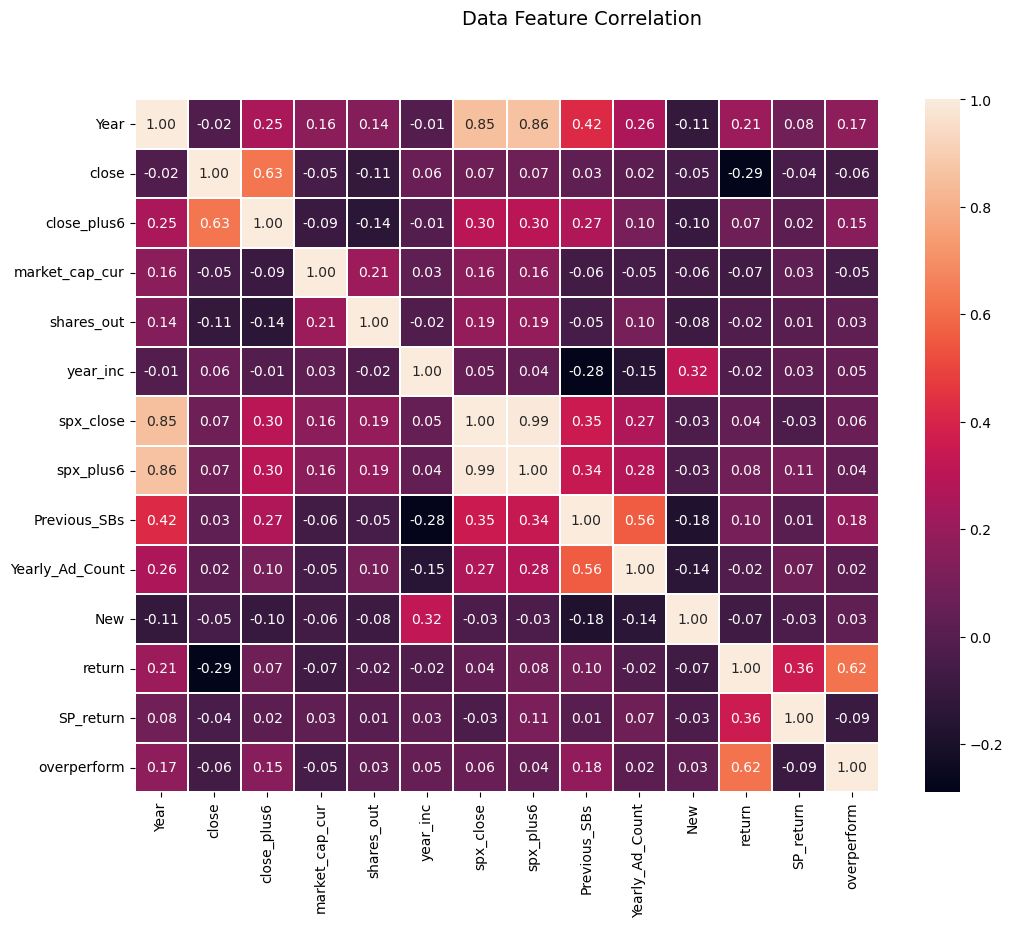

In [12]:
#correlation matrix 2
#Create a correlation heatmap for looking at the correlation of all variables/features for USA wins
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, fmt='.2f',
                 linewidths=.05)
f.suptitle('Data Feature Correlation ', fontsize=14)

In [13]:
# Average returns by Product_type
df.groupby('Product_type')['return'].mean()

Product_type
Alcohol       0.110214
Car          -0.032398
Clothing      0.092685
Film          0.018133
Food          0.095866
Gaming       -0.142681
Goods         0.063826
Service       0.090083
Soft drink    0.038239
Sports       -0.098980
TV            0.105572
Technology    0.102714
Website      -0.248698
Wireless      0.050925
Name: return, dtype: float64

In [14]:
# Average overperform by Product_type
df.groupby('Product_type')['overperform'].mean()

Product_type
Alcohol       0.350000
Car           0.222222
Clothing      0.200000
Film          0.330769
Food          0.431034
Gaming        0.200000
Goods         0.212121
Service       0.423077
Soft drink    0.533333
Sports        0.000000
TV            0.347826
Technology    0.272727
Website       0.088889
Wireless      0.368421
Name: overperform, dtype: float64

### Drop all the rows without a return.

In [15]:
df_nona = df.dropna(subset=['return'])
df_nona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 4 to 555
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             388 non-null    int64  
 1   Product_type     388 non-null    object 
 2   Ticker           388 non-null    object 
 3   close            388 non-null    float64
 4   close_plus6      388 non-null    float64
 5   market_cap_cur   348 non-null    float64
 6   shares_out       352 non-null    float64
 7   year_inc         387 non-null    float64
 8   spx_close        386 non-null    float64
 9   spx_plus6        386 non-null    float64
 10  Previous_SBs     388 non-null    int64  
 11  Yearly_Ad_Count  388 non-null    int64  
 12  New              388 non-null    int64  
 13  return           388 non-null    float64
 14  SP_return        386 non-null    float64
 15  overperform      388 non-null    int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 51.5+ KB


In [16]:
# check the rows with no S & P return for errors
df_nona[df.SP_return.isna()]

,Year,Product_type,Ticker,close,close_plus6,market_cap_cur,shares_out,year_inc,spx_close,spx_plus6,Previous_SBs,Yearly_Ad_Count,New,return,SP_return,overperform
4,1979,Soft drink,KO,0.927083,0.770833,2.757355e+11,4.324578e+09,1919.0,NaN,NaN,0,1,0,-0.168539,NaN,0
6,1982,Food,MCD,1.470000,1.850000,2.174144e+11,7.300317e+08,1964.0,NaN,NaN,0,1,0,0.258503,NaN,0


In [17]:
# drop these as being too old where the data is to sparse
df_clean = df_nona[~(df.SP_return.isna())]
# really want to get rid of all rows that are for multiple ads by the same ticker in the same year.
df_clean = df_clean.drop_duplicates(subset=['Year','Ticker'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 10 to 555
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             232 non-null    int64  
 1   Product_type     232 non-null    object 
 2   Ticker           232 non-null    object 
 3   close            232 non-null    float64
 4   close_plus6      232 non-null    float64
 5   market_cap_cur   206 non-null    float64
 6   shares_out       209 non-null    float64
 7   year_inc         231 non-null    float64
 8   spx_close        232 non-null    float64
 9   spx_plus6        232 non-null    float64
 10  Previous_SBs     232 non-null    int64  
 11  Yearly_Ad_Count  232 non-null    int64  
 12  New              232 non-null    int64  
 13  return           232 non-null    float64
 14  SP_return        232 non-null    float64
 15  overperform      232 non-null    int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 30.8+ KB


In [18]:
df_clean[df_clean.year_inc.isna()]

,Year,Product_type,Ticker,close,close_plus6,market_cap_cur,shares_out,year_inc,spx_close,spx_plus6,Previous_SBs,Yearly_Ad_Count,New,return,SP_return,overperform
106,2000,Website,LFMN,43.25,22.5,NaN,NaN,NaN,1394.46,1430.83,0,1,0,-0.479769,0.026082,0


In [19]:
df_clean.loc[106:107,["New", "year_inc"]] = [1, 1999]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 10 to 555
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             232 non-null    int64  
 1   Product_type     232 non-null    object 
 2   Ticker           232 non-null    object 
 3   close            232 non-null    float64
 4   close_plus6      232 non-null    float64
 5   market_cap_cur   206 non-null    float64
 6   shares_out       209 non-null    float64
 7   year_inc         232 non-null    float64
 8   spx_close        232 non-null    float64
 9   spx_plus6        232 non-null    float64
 10  Previous_SBs     232 non-null    int64  
 11  Yearly_Ad_Count  232 non-null    int64  
 12  New              232 non-null    int64  
 13  return           232 non-null    float64
 14  SP_return        232 non-null    float64
 15  overperform      232 non-null    int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 38.9+ KB


Let's just fill them with the mean for their Product_type

In [20]:
df_clean[['market_cap_cur','shares_out']] = df_clean[['market_cap_cur','shares_out']].fillna(df_clean.groupby('Product_type')[['market_cap_cur','shares_out']].transform('mean'))
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 10 to 555
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             232 non-null    int64  
 1   Product_type     232 non-null    object 
 2   Ticker           232 non-null    object 
 3   close            232 non-null    float64
 4   close_plus6      232 non-null    float64
 5   market_cap_cur   232 non-null    float64
 6   shares_out       232 non-null    float64
 7   year_inc         232 non-null    float64
 8   spx_close        232 non-null    float64
 9   spx_plus6        232 non-null    float64
 10  Previous_SBs     232 non-null    int64  
 11  Yearly_Ad_Count  232 non-null    int64  
 12  New              232 non-null    int64  
 13  return           232 non-null    float64
 14  SP_return        232 non-null    float64
 15  overperform      232 non-null    int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 38.9+ KB


Text(0.5, 0.98, 'Data Feature Correlation ')

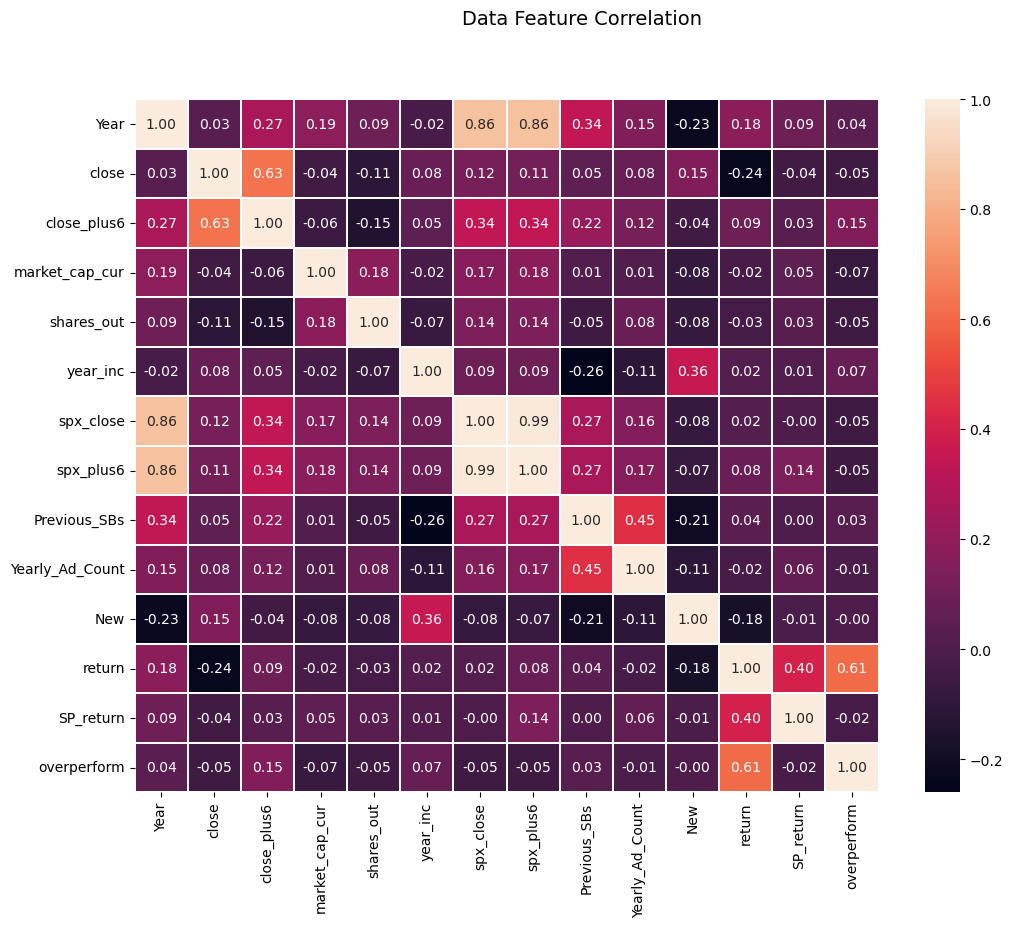

In [21]:
#correlation matrix 1
#Create a correlation heatmap for looking at the correlation of all variables
corrmat = df_clean.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, fmt='.2f',
                 linewidths=.05)
f.suptitle('Data Feature Correlation ', fontsize=14)

### Not looking good. 
So far nothing seems correlated to `overperform`

Slight chance with `year_inc` and still have `Product_type` but this is not promising.

In [22]:
df_clean.groupby(['Product_type','overperform'])[['Previous_SBs','Yearly_Ad_Count']].mean()

Previous_SBs  Yearly_Ad_Count
Product_type overperform                               
Alcohol      0                8.166667         2.000000
             1               12.285714         3.000000
Car          0                3.928571         1.535714
             1                3.181818         1.636364
Clothing     0                0.500000         1.250000
             1                0.500000         1.000000
Film         0                5.114286         2.085714
             1                5.600000         1.800000
Food         0                6.571429         1.928571
             1                3.842105         1.578947
Gaming       1                0.000000         1.000000
Goods        0                0.700000         1.400000
             1                0.428571         1.000000
Service      0                0.333333         1.333333
             1                1.625000         1.250000
Soft drink   0                5.000000         1.250000
             1                5.285714         1.571429
TV           0                0.000000         1.000000
             1                0.800000         1.600000
Technology   0                0.250000         1.000000
             1                0.500000         1.000000
Website      0                0.833333         1.333333
             1                1.250000         1.000000
Wireless     0                1.500000         1.833333
             1                1.333333         2.333333

Text(0.5, 0.98, 'Data Feature Correlation ')

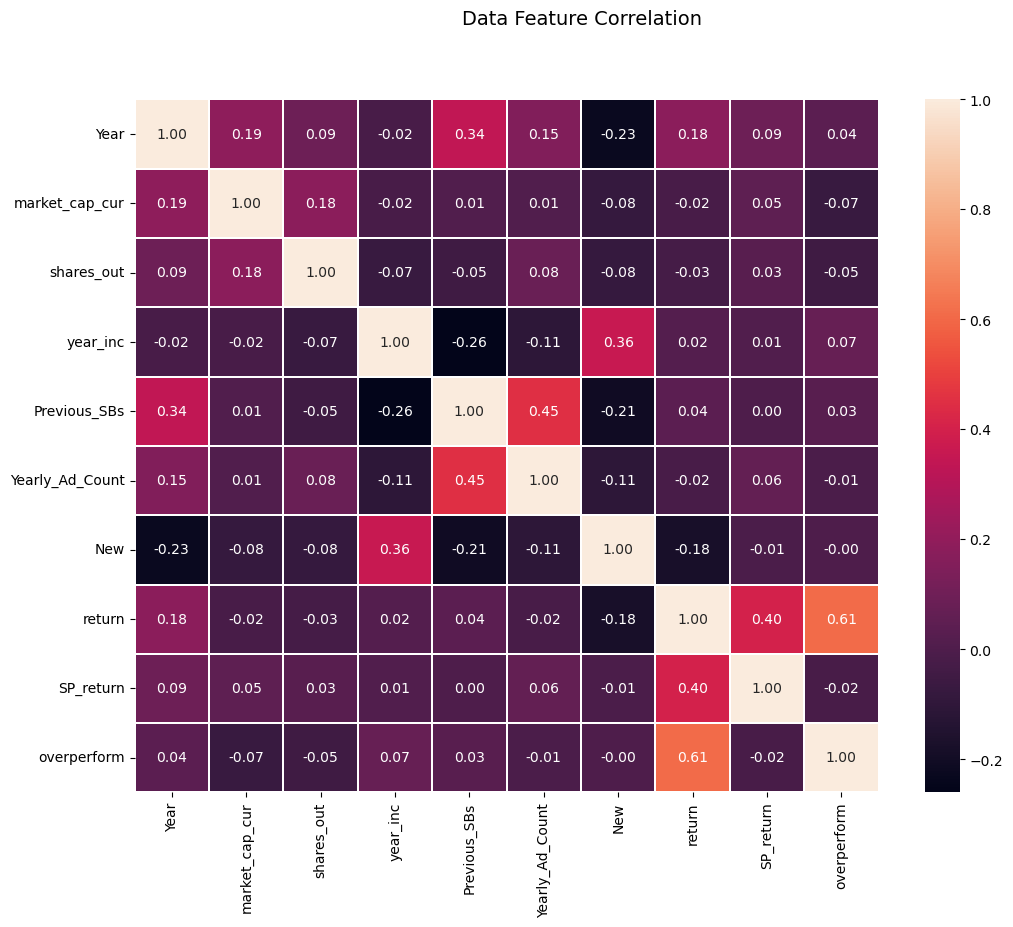

In [23]:
#correlation matrix 2
#Create a correlation heatmap for dropping close clos_plus6, spx_close and spx_plus6
corrmat = df_clean.drop(columns=['close', 'close_plus6', 'spx_close', 'spx_plus6']).corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, fmt='.2f',
                 linewidths=.05)
f.suptitle('Data Feature Correlation ', fontsize=14)

In [24]:
df_clean.groupby('Product_type')['overperform'].mean()

Product_type
Alcohol       0.538462
Car           0.282051
Clothing      0.333333
Film          0.416667
Food          0.575758
Gaming        1.000000
Goods         0.411765
Service       0.571429
Soft drink    0.636364
TV            0.714286
Technology    0.333333
Website       0.250000
Wireless      0.333333
Name: overperform, dtype: float64

There are still too many small categories

Export `df_clean` to a csv file `df2.csv` for the next workbook

In [25]:
# Export to csv
df_clean.to_csv('df2.csv')